<a href="https://colab.research.google.com/github/czyz-patryk/dataScience/blob/main/pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [7]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf 
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.9.2


In [9]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [11]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [12]:
X_train = X_train / 255.
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

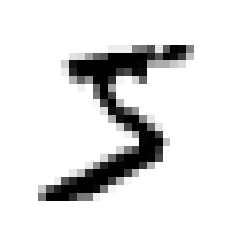

In [15]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

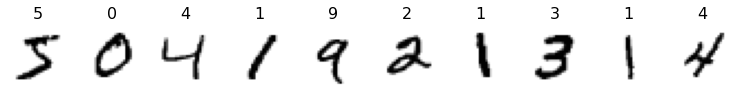

In [43]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1407 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1046 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0755 - accuracy: 0.9766


In [22]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0773 - accuracy: 0.9773 - 965ms/epoch - 3ms/step


[0.07728680968284607, 0.9772999882698059]

In [23]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.294686,0.914250
1,0.140668,0.958450
2,0.104616,0.968233
3,0.085496,0.974050
4,0.075476,0.976617


In [30]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

In [31]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[0.000000011119, 0.000000066277, 0.000001822572, ..., 0.9999308     , 0.000000050021, 0.000002838891],
       [0.000000166522, 0.000015991061, 0.9999744     , ..., 0.000000000004, 0.000000106238, 0.            ],
       [0.000000295525, 0.9986183     , 0.000052065832, ..., 0.0008513033  , 0.0004025274  , 0.000000468171],
       ...,
       [0.000000000007, 0.000000000329, 0.000000000106, ..., 0.000007589246, 0.000001393945, 0.0001235866  ],
       [0.000000071177, 0.000000388327, 0.000000002019, ..., 0.000000964979, 0.00003945773 , 0.000000000732],
       [0.000000051395, 0.000000000001, 0.000000219592, ..., 0.            , 0.000000001181, 0.            ]],
      dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [38]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [40]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([247, 259, 320, 321, 340, 381, 445, 448, 495, 582], dtype='int64')

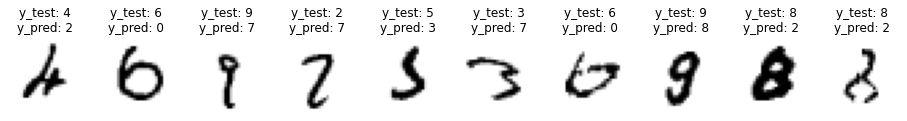

In [42]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()